In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [5]:
import cupy as cp

In [6]:
PROJECT_PATH = '../'
# SRBF_PATH = "/scratch/ceph/swei20/data/dnn/BHB/rbf_RedM_R5000_1k.h5"
# REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
sys.path.insert(0, PROJECT_PATH)

In [493]:
ll = pd.read_csv("../data/Klines.csv")

In [473]:
def air2vac(wave):
    wlum = wave * 1e5
    return (1+1e-6*(287.6155+1.62887/wlum**2+0.01360/wlum**4)) * wave

In [477]:
ll["Wvac"] = ll["W"].apply(air2vac)

In [481]:
ll["Wvac"] = ll["Wvac"].apply(lambda x: np.round(x, 2))

In [492]:
ll.to_csv("../data/Klines.csv", index=None)

In [491]:
ll=ll.rename(columns={"W": "Wair", "Wvac": "W"})

In [494]:
ll[ll["Z"]=="H"]

,ZN,Wair,Z,W
0,H.B3,6562.8,H,6564.69
1,H.B4,4861.4,H,4862.80
2,H.B5,4340.5,H,4341.75
3,H.B6,4101.0,H,4102.18
4,H.B7,3970.0,H,3971.14
5,H.B8,3889.0,H,3890.12
6,H.B9,3835.4,H,3836.50
7,H.B10,3797.8,H,3798.89
8,H.B11,3770.6,H,3771.68
9,H.B12,3750.1,H,3751.18


In [ ]:
def plot_dfSLU(dfSL=None, alpha=1):
    if dfSL is None: dfSL = self.dfSL
    nPlots = len(self.SZs)
    neg= - 1/nPlots
    f, axs = plt.subplots(nPlots, 1, figsize=(20, 1*nPlots), sharex="col", sharey="col")
    for ii, SZ in enumerate(self.SZs): 
        ax=axs[ii]
        SLZ = dfSL[dfSL["Z"]==SZ].values
        # if ZU == 20:
        #     ax.vlines([8544.490, 8500.412,8664.576], 0, 1,"k",linestyle="-.", alpha=0.4)
        for i in range(len(SLZ)):
            SL = SLZ[i]
            c = np.where(self.SZs==SL[3])[0][0]
            cc=cm.gist_rainbow((c+neg)/nPlots)
            ax.axvspan(SL[0], SL[1], ymin=0, ymax=1, lw=2, color=cc, alpha=alpha, label=int(SL[3]))
            self.set_unique_legend(ax,loc=0)
            ax.xaxis.grid(1)
    ax.set_ylim(0, 1)
    ax.set_ylabel("I")
    ax.set_xlim(self.W[0], self.W[1])

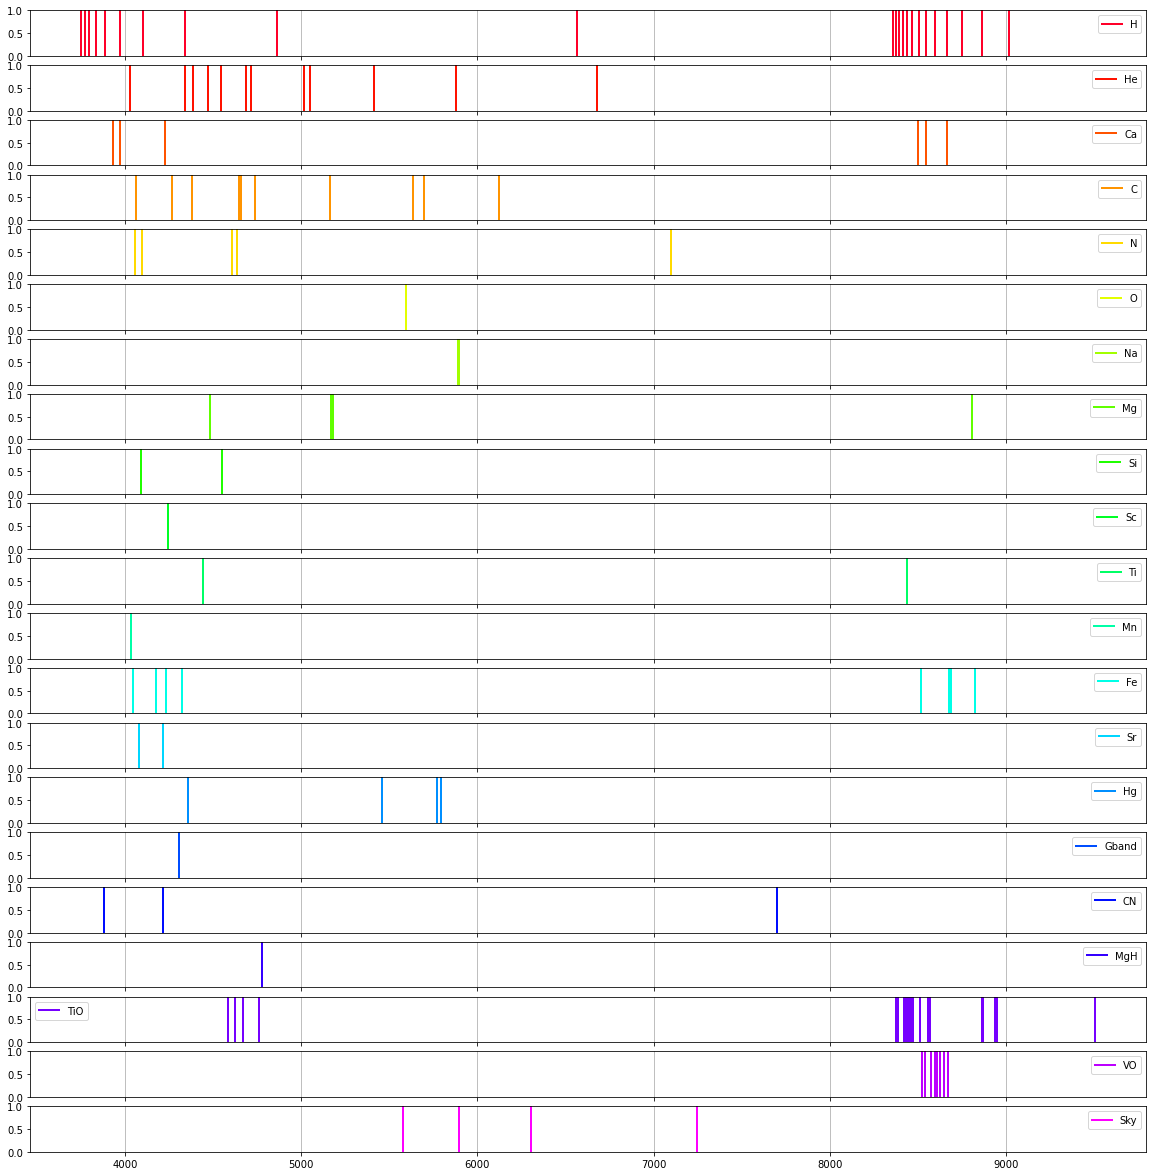

In [468]:
l.plot_dfAL(dfAL=ll)

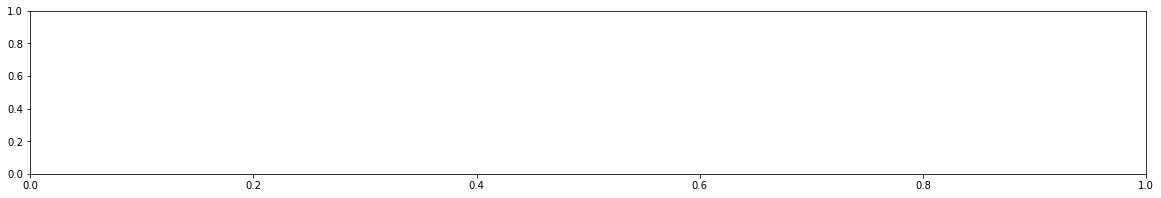

In [464]:
SZ = ll["Z"].unique()
nPlots = len(SZ)
neg= - 1/nPlots
c = np.where(SZ==SL[3])[0][0]
cc=cm.gist_rainbow((c+neg)/nPlots)
plt.vlines(ll["wave"], 0, 1, c)
ax = plt.subplots(1, figsize=(20, 3))[1]

array(['H', 'He', 'Ca', 'C', 'N', 'O', 'Na', 'Mg', 'Si', 'Sc', 'Ti', 'Mn',
       'Fe', 'Sr', 'Hg', 'Gband', 'CN', 'MgH', 'TiO', 'VO', 'Sky'],
      dtype=object)

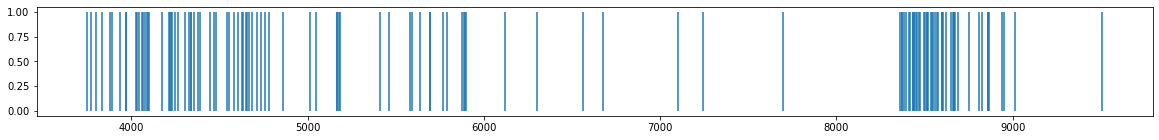

In [459]:
plt.figure(figsize=(20,2))


In [409]:
from lv.base.baseLL import KLine

In [410]:
l=KLine("RedM")
# l.get_zdf([1,11,12,20,26])

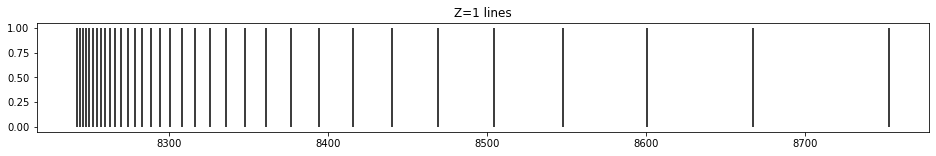

In [413]:
l.plot_Z(1)

In [428]:
l.get_SLs()

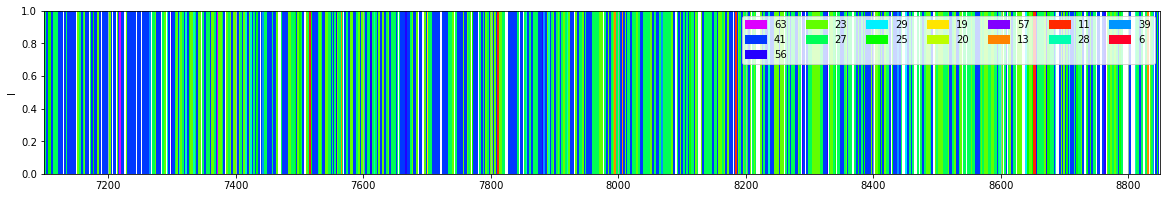

In [432]:
l.plot_dfSL()

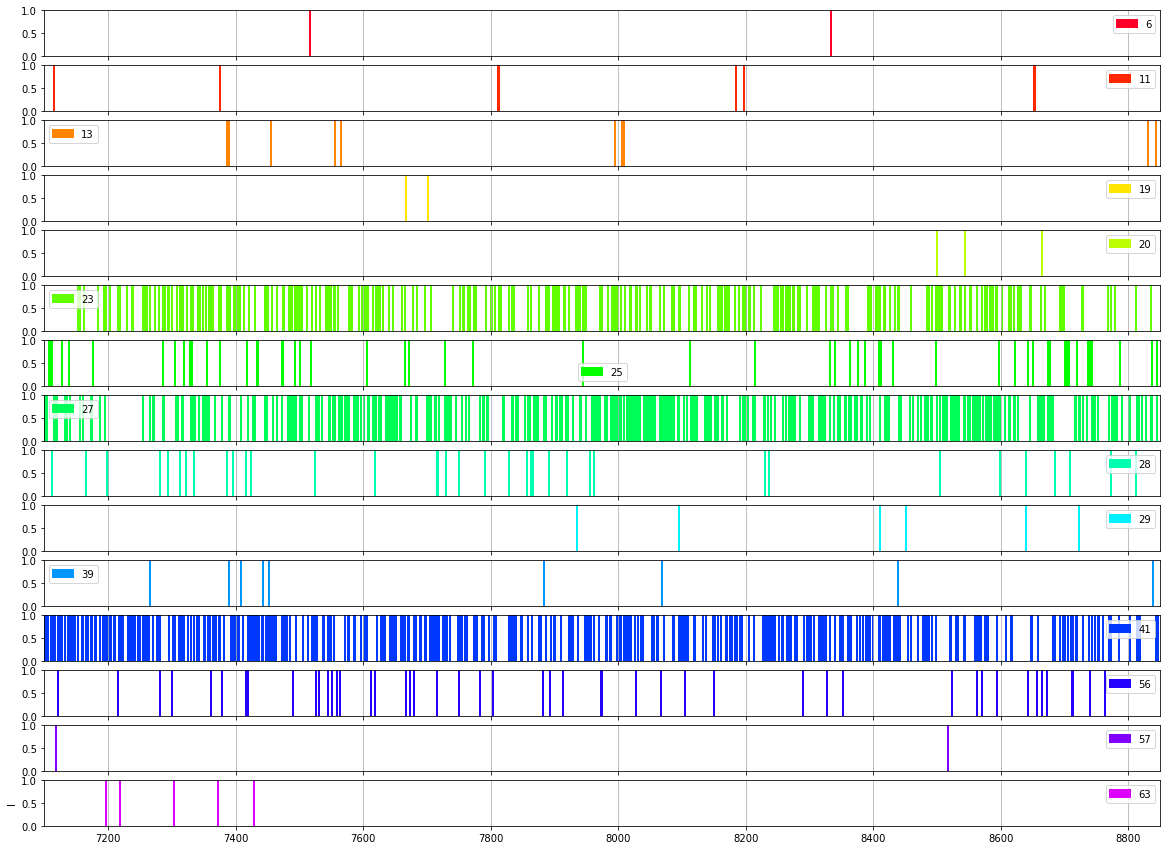

In [433]:
l.plot_dfSLU()

In [440]:
b=KLine("Blue")

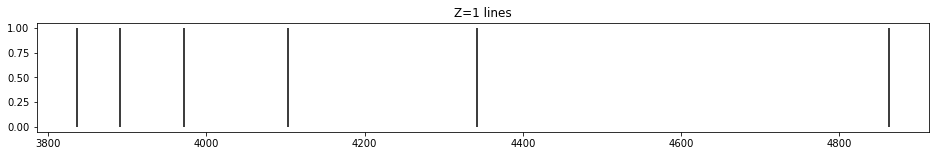

In [441]:
b.plot_Z(1)

In [448]:
b.get_SLs(lw=2)

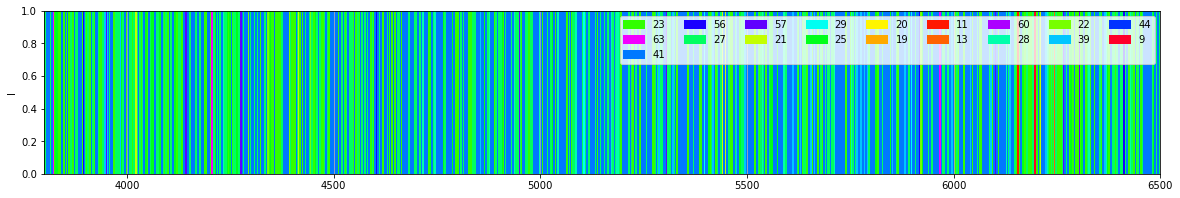

In [449]:
b.plot_dfSL()

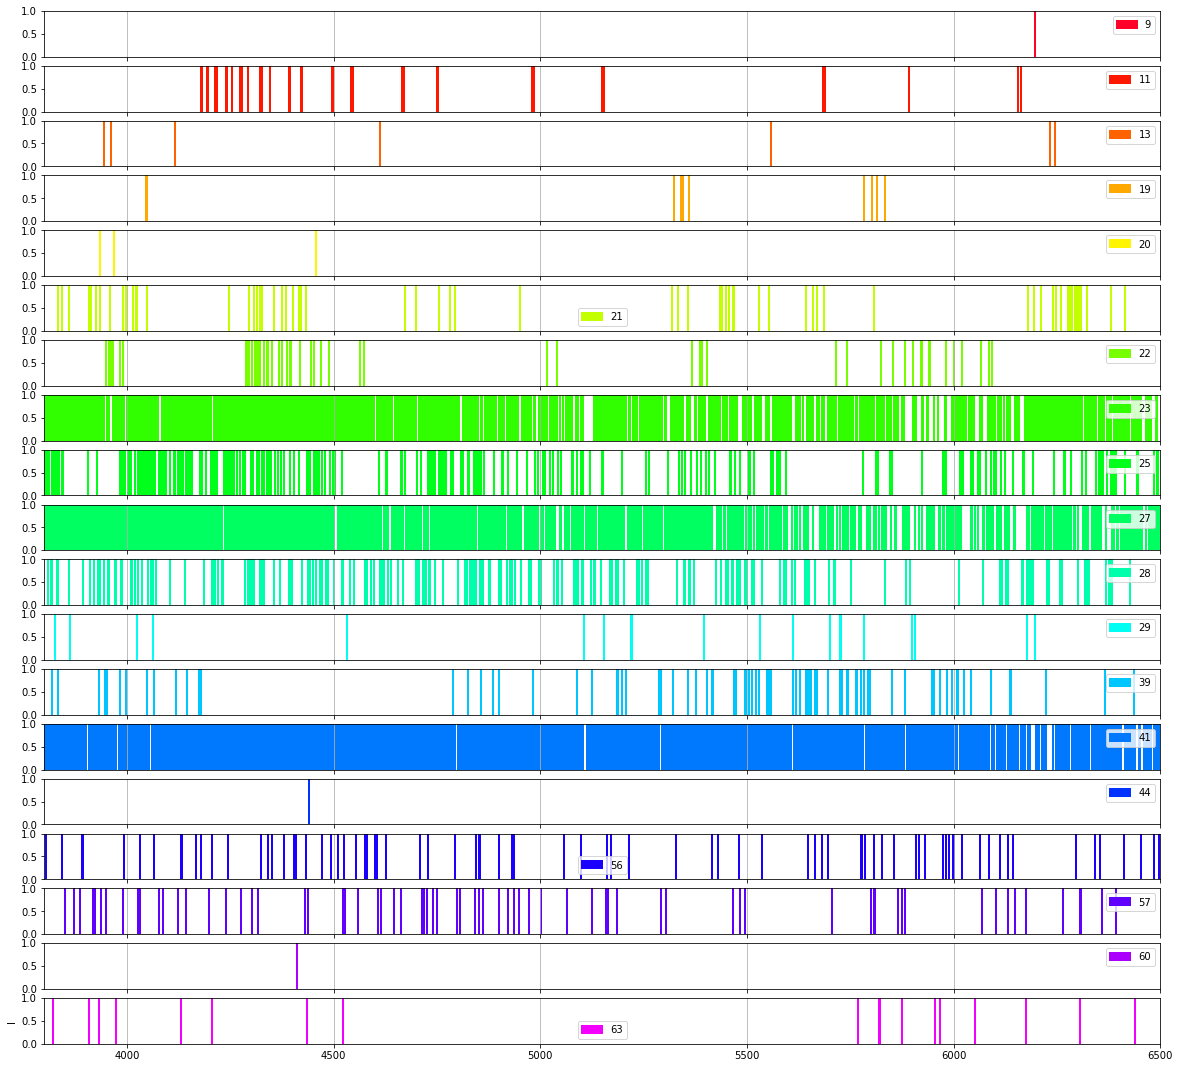

In [450]:
b.plot_dfSLU()

In [440]:
b=KLine("NIR")

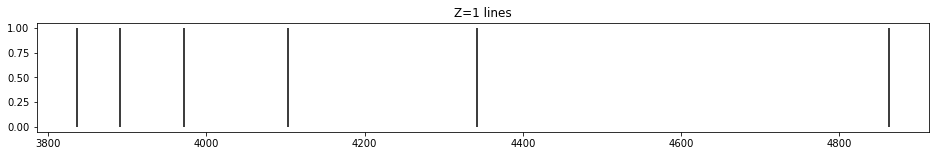

In [441]:
b.plot_Z(1)

In [445]:
b.get_SLs(lw=5)

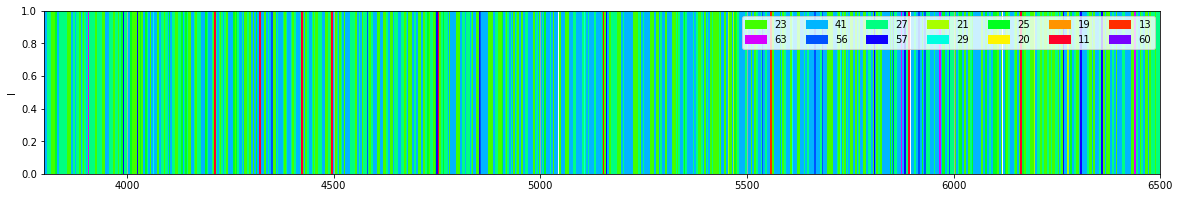

In [446]:
b.plot_dfSL()

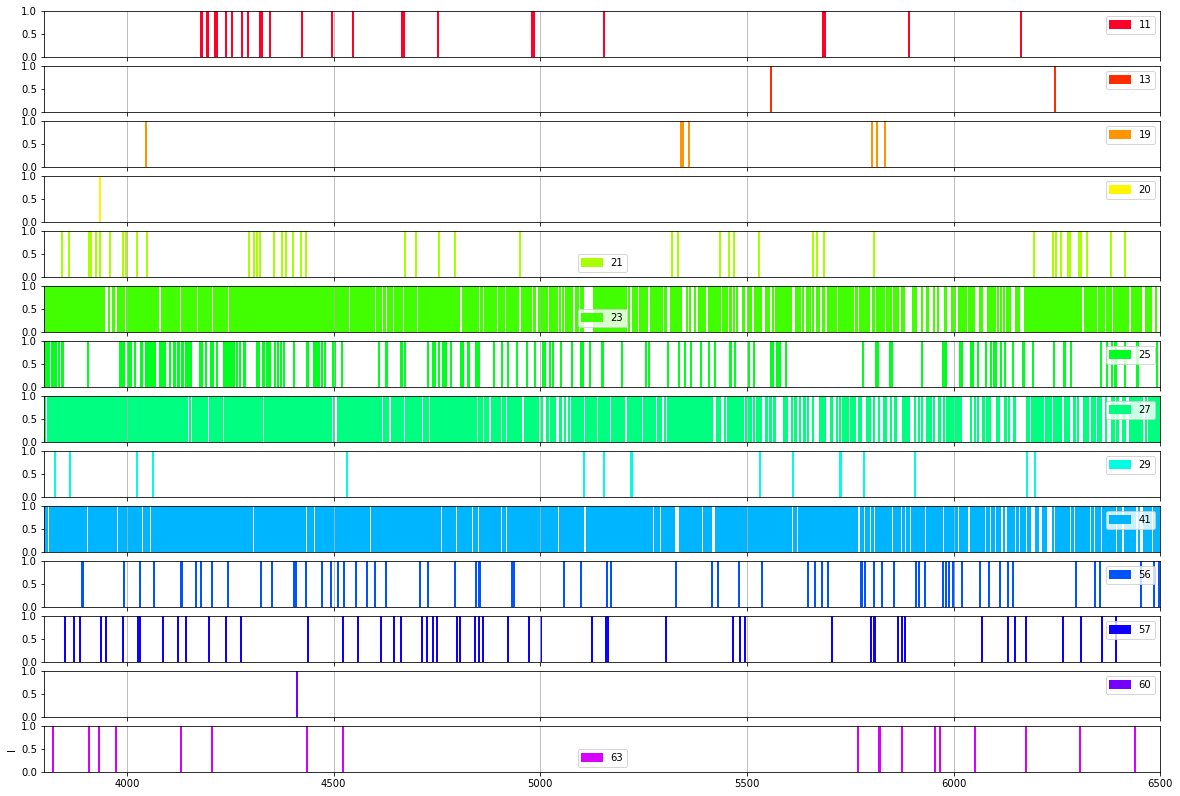

In [447]:
b.plot_dfSLU()